# Personal Project: Sustainability and Energy usage/production

This project uses a dataset from Kaggle called Global Data on Sustainable Energy: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy

View this notebook on my GitHub page: https://github.com/siegelhannah/Energy-Use-Sustainability

The dataset has country-level information over a period of 21 years (2000-2020) on countries' energy production, consumption, sources, Co2 emissions, and other metrics.

I chose to explore this data because I'm interested in climate solutions & sustainability, and energy policy is the one of the key large-scale steps to mitigating climate change / creating solutions to lower global temperature levels.

## 1) Data Cleaning/Preprocessing

In [751]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# from sklearn.linear_model import LinearRegression

### Import the data

In [753]:
energy = pd.read_csv("global-data-on-sustainable-energy.csv")
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


### Rename / reorder columns

In [755]:
energy_simple = energy.rename(columns={'Entity': 'Country', 'Access to electricity (% of population)': 'Electr_access', 'Access to clean fuels for cooking': 'Fuel_access',
                      'Renewable-electricity-generating-capacity-per-capita': 'Renew_production_capacity', 'Financial flows to developing countries (US $)': 'Aid', 
                                      'Renewable energy share in the total final energy consumption (%)': 'Prop_renew_energy_consumed', 'Electricity from fossil fuels (TWh)': 'FF_produced', 
                                      'Electricity from nuclear (TWh)': 'Nuc_produced', 'Electricity from renewables (TWh)': 'Renew_produced', 
                                      'Low-carbon electricity (% electricity)': 'Prop_lowcarbon_produced', 'Primary energy consumption per capita (kWh/person)': 'Energy_consumption', 
                                      'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'Energy_use_perGDP', 'Value_co2_emissions_kt_by_country': 'CO2_emissions', 
                                       'Renewables (% equivalent primary energy)': 'Prop_renew_energy_produced', 'Density\\n(P/Km2)': 'Density', 'Land Area(Km2)': 'Land_area', 'Latitude': 'Lat', 'Longitude': 'Long'})

### Making sure all number vals are ints/floats

In [757]:
for col in energy_simple.columns:
    if not isinstance(energy_simple[col][0], float) or isinstance(energy_simple[col][0], int):
        print(col)

Country
Year
Density


In [758]:
energy_simple['Density'] = energy_simple['Density'].str.replace(',', '', regex=False).astype(float)

I am also interested in looking at the total GDP for each country (instead of the gdp growth/gdp per capita), as well as the total energy consumption (instead of energy consumption per capita). Let's add these columns.

In [760]:
# Add a column of total GDP (Billions of $)
energy_simple['gdp'] = (energy_simple['gdp_per_capita'] * energy_simple['Density'] * energy_simple['Land_area']) / 1000000000

# Add a column of total energy consumption (convert to TWh)
energy_simple['Energy_consumption_total'] = (energy_simple['Energy_consumption'] * energy_simple['Density'] * energy_simple['Land_area']) / 1000000000

# drop unnecessary variables that we just needed for calculation
energy_simple.drop(columns=['gdp_per_capita', 'gdp_growth', 'Energy_consumption', 'Density', 'Land_area'], inplace=True) 

In [761]:
# Reorder the columns so similar variables are together
new_order = ['Country', 'Year', 'Renew_production_capacity', 'FF_produced', 'Nuc_produced', 'Renew_produced', 'Prop_lowcarbon_produced', 
             'Prop_renew_energy_produced', 'Electr_access', 'Fuel_access', 'Prop_renew_energy_consumed', 'Energy_consumption_total', 'Energy_use_perGDP', 
             'Aid', 'CO2_emissions', 'gdp', 'Lat', 'Long']

energy_simple = energy_simple[new_order]

### Granularity

In [763]:
print(max(energy_simple["Year"]), min(energy_simple["Year"])) # year range

print(len(energy_simple.groupby("Country").count().reset_index()["Country"])) # number of countries

2020 2000
176


In [764]:
years=energy_simple.groupby("Country").count()
missing_yrs = years[years["Year"] != 21]
print(missing_yrs["Year"]) # countries with missing time series data
print(energy_simple.shape[0])

Country
French Guiana     1
Montenegro       14
Serbia           14
South Sudan       8
Name: Year, dtype: int64
3649


**Granularity of the data:** Each row of the data represents a different year, from 2000-2020, repeated for each country.
There are 176 countries and 21 rows per country, except for 4 countries which have less years represented. There are 3649 rows total.

### Dealing with Missing values

In [767]:
missing_values = energy_simple.isna().sum()
proportion_missing = missing_values / energy_simple.shape[0]
print(f'Missing proportions of variables:\n {proportion_missing.sort_values(ascending=False)}')

Missing proportions of variables:
 Prop_renew_energy_produced    0.585640
Aid                           0.572486
Renew_production_capacity     0.255138
CO2_emissions                 0.117292
gdp                           0.077281
Energy_use_perGDP             0.056728
Prop_renew_energy_consumed    0.053165
Fuel_access                   0.046314
Nuc_produced                  0.034530
Prop_lowcarbon_produced       0.011510
FF_produced                   0.005755
Renew_produced                0.005755
Electr_access                 0.002740
Lat                           0.000274
Long                          0.000274
Energy_consumption_total      0.000274
Year                          0.000000
Country                       0.000000
dtype: float64


<Axes: >

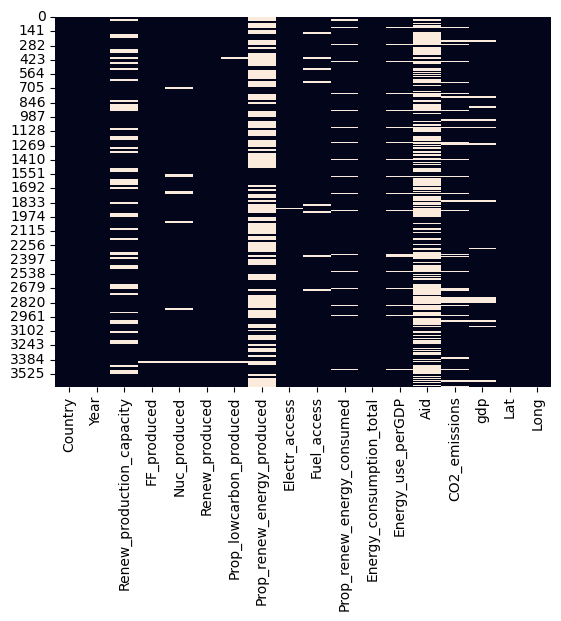

In [768]:
sns.heatmap(energy_simple.isna(), cbar=False)

**The variables with the most significant proportions of missing variables are:**
- Prop_renew_energy_produced, or the proportion of a country's overall energy they produce that comes from renewables. Over 50% of this data is missing, so it might be best practice to just drop the variable entirely rather than try to interpolate it for thousands of rows/entries.

In [770]:
energy_simple = energy_simple.drop('Prop_renew_energy_produced', axis=1)

- Aid, or the financial assistance a developing country received from developed countries for renewable energy. Around half of this data is missing. However, we can reasonably infer that a missing value is equivalent to a value of 0 dollars in financial aid, and therefore fill the NA values with 0.

In [772]:
energy_simple['Aid'] = energy_simple['Aid'].fillna(0)

- Renew_production_capacity, or the renewable energy production capacity per person in a given country. Let's examine where the data is missing:

In [774]:
energy_simple[energy_simple['Renew_production_capacity'].isna()].groupby('Country').count()['Year']

Country
Albania                   21
Australia                 21
Austria                   21
Belarus                   21
Belgium                   21
Bermuda                   21
Bosnia and Herzegovina    21
Bulgaria                  21
Canada                    21
Croatia                   21
Cyprus                    21
Czechia                   21
Denmark                   21
Estonia                   21
Finland                   21
France                    21
Germany                   21
Greece                    21
Hungary                   21
Iceland                   21
Ireland                   21
Israel                    21
Italy                     21
Japan                     21
Latvia                    21
Lithuania                 21
Luxembourg                21
Malta                     21
Montenegro                14
Netherlands               21
New Zealand               21
North Macedonia           21
Norway                    21
Poland                    21
Portug

Since there are 21 rows per country (2000-2020), it seems like the data is missing in every single row/year for a lot of these countries. In addition, some of these countries would be points of interest in our analysis like the United States (known high GDP and high CO2 emissions, good for analysis). Because of this, I am choosing to exclude this entire variable from the data because it would be too difficult to fill.

In [776]:
energy_simple = energy_simple.drop('Renew_production_capacity', axis=1)

- CO2_emissions has about 11% of the data missing. Let's examing the countries that have some data missing vs. all. We can drop the rows for countries that have no data at all for CO2 emissions, because this variable is key in our analysis.

In [778]:
missing = energy_simple[energy_simple['CO2_emissions'].isna()].groupby('Country').count().reset_index()

countries_with_data = missing[missing['Year'] < 21] # countries with at least some data
countrynames_with_data = countries_with_data['Country'].tolist() # list of country names

countries_to_drop = missing[missing['Year'] == 21] # countries with all CO2 data missing
countrynames_drop = countries_to_drop['Country'].tolist() # list of country names

print(f"The maximum number of missing CO2_emissions entries for a country in this filtered dataset is only {
countries_with_data['Year'].max()}. Let's drop the rest, since the rest have no data at all for CO2.")

The maximum number of missing CO2_emissions entries for a country in this filtered dataset is only 4. Let's drop the rest, since the rest have no data at all for CO2.


In [779]:
# drop the countries/rows with no data at all:
i_to_drop = energy_simple[energy_simple['Country'].isin(countrynames_drop)].index # find indices of rows to drop
energy_simple = energy_simple.drop(i_to_drop) # drop the rows

In [780]:
# We also need to consider countries which may have less than 21 rows of data in the first place, 
# and examine how much of their CO2 data is missing
print(missing_yrs["Year"])
missing[(missing['Country'] == 'French Guiana') | (missing['Country'] == 'Montenegro') | (missing['Country'] == 'Serbia') | (missing['Country'] == 'South Sudan')]

Country
French Guiana     1
Montenegro       14
Serbia           14
South Sudan       8
Name: Year, dtype: int64


,Country,Year,FF_produced,Nuc_produced,Renew_produced,Prop_lowcarbon_produced,Electr_access,Fuel_access,Prop_renew_energy_consumed,Energy_consumption_total,Energy_use_perGDP,Aid,CO2_emissions,gdp,Lat,Long
58,French Guiana,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0
105,Montenegro,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1
140,Serbia,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1
149,South Sudan,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1


Since French Guiana only has 1 entry in the entire dataset and the CO2 value is missing for that 1 entry, we will drop the entire row/country.

In [782]:
# drop French Guiana
i_to_drop = energy_simple[energy_simple['Country'] == 'French Guiana'].index # index
energy_simple = energy_simple.drop(i_to_drop) # drop row

I also want to make sure there is enough data for GDP by country, since I want to examine country GDP in relation to my other variables.

In [784]:
energy_simple[energy_simple['gdp'].isna()].groupby('Country').count().reset_index()[['Country', 'Year']]

,Country,Year
0,Afghanistan,2
1,Aruba,2
2,Cayman Islands,6
3,Czechia,21
4,Eritrea,9
5,Nauru,10
6,New Caledonia,1
7,Sao Tome and Principe,1
8,Somalia,13
9,South Sudan,5


The only country with no data at all for gdp is Czechia. Since Gdp is an important part of our analysis, we can remove this data for Czechia for consistency.

In [786]:
# Drop Czechia
i_to_drop = energy_simple[energy_simple['Country'] == 'Czechia'].index # index
energy_simple = energy_simple.drop(i_to_drop) # drop rows

Next, missing variables like Nuc_produced (electricity produced from nuclear energy by country) and Fuel_access can be filled with 0 due to lack of data.

In [788]:
energy_simple['Nuc_produced'] = energy_simple['Nuc_produced'].fillna(0)
energy_simple['Fuel_access'] = energy_simple['Fuel_access'].fillna(0)

The rest of our missing data is missing at a proportion of less than 10% of the total, and for these variables the missing values are also spread out over different years. Let's fill the rest of the missing data with the average of the values for each country, to try and preserve country-level trends.

In [790]:
columns_to_fill = ['FF_produced', 'Renew_produced', 'Prop_lowcarbon_produced', 'Electr_access', 'Prop_renew_energy_consumed', 'Energy_use_perGDP', 'CO2_emissions', 'gdp']

for column in columns_to_fill: 
    energy_simple[column] = energy_simple.groupby('Country')[column].transform(lambda x: x.fillna(x.mean()))

<Axes: >

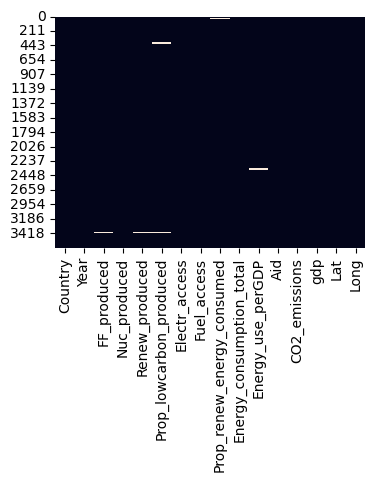

In [791]:
plt.figure(figsize=(4,3))
sns.heatmap(energy_simple.isna(), cbar=False)

The remaining missing data that couldn't be filled by column averages is data which is missing from every single year for a particular country. Since we can see above that this is very few countries, let's just drop those rows to complete our data cleaning.

In [793]:
energy_simple.dropna(inplace=True)

<Axes: >

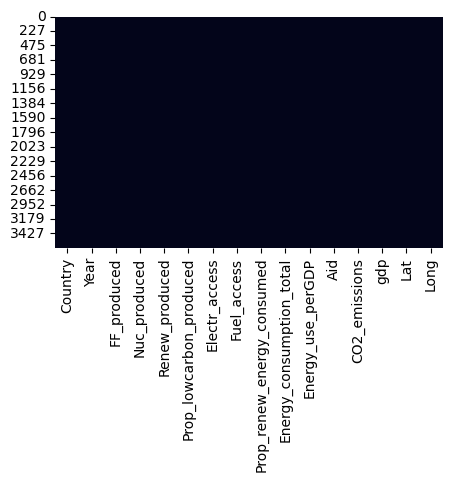

In [794]:
# let's look at how much it's improved!
plt.figure(figsize=(5,3))
sns.heatmap(energy_simple.isna(), cbar=False)

In [795]:
print(len(energy_simple.groupby("Country").count().reset_index()["Country"])) # number of countries
years=energy_simple.groupby("Country").count()
missing_yrs = years[years["Year"] != 21]
print(missing_yrs["Year"]) # countries with missing time series data
print(energy_simple.shape[0])

158
Country
Montenegro     14
Serbia         14
South Sudan     8
Name: Year, dtype: int64
3291


After cleaning and dropping irrelevant parts of our data, we now have a granularity of 158 countries and 21 rows per country, except for the 3 countries which have less years represented.

### Our Variables After Data Cleaning:

In [798]:
energy_simple.head()

,Country,Year,FF_produced,Nuc_produced,Renew_produced,Prop_lowcarbon_produced,Electr_access,Fuel_access,Prop_renew_energy_consumed,Energy_consumption_total,Energy_use_perGDP,Aid,CO2_emissions,gdp,Lat,Long
0,Afghanistan,2000,0.16,0.0,0.31,65.957440,1.613591,6.2,44.99,11.841685,1.64,20000.0,760.000000,17.181920,33.93911,67.709953
1,Afghanistan,2001,0.09,0.0,0.50,84.745766,4.074574,7.2,45.60,9.270478,1.74,130000.0,730.000000,17.181920,33.93911,67.709953
2,Afghanistan,2002,0.13,0.0,0.56,81.159424,9.409158,8.2,37.83,8.251837,1.40,3950000.0,1029.999971,7.021644,33.93911,67.709953
3,Afghanistan,2003,0.31,0.0,0.63,67.021280,14.738506,9.5,36.66,8.999530,1.40,25970000.0,1220.000029,7.462182,33.93911,67.709953
4,Afghanistan,2004,0.33,0.0,0.56,62.921350,20.064968,10.9,44.24,7.992345,1.20,0.0,1029.999971,8.272184,33.93911,67.709953


#### Variables relating to production:
- **FF_produced:** Electricity generated from fossil fuels (coal, oil, gas) (TWh)
- **Nuc_produced:** Electricity generated from nuclear power (TWh)
- **Renew_produced:** Electricity generated from renewable sources (hydro, solar, wind, etc.) (TWh)
- **Prop_lowcarbon_produced:** Percentage of electricity from low-carbon sources (BOTH nuclear and renewables).

#### Variables relating to consumption:
- **Electr_access:** The percentage of population with access to electricity
- **Fuel_access:** The percentage of the population with access to clean fuels (for cooking)
- **Prop_renew_energy_consumed:** Percentage of the total ENERGY consumption that is from renewable sources
- **Energy_consumption_total:** Country's ENERGY consumption / demand, total (TWh)
- **Energy_use_perGDP:** Reflects the efficiency of energy use per unit of GDP (rate of converting energy into GDP or $)

#### Variables Which Could Provide Context or Influences:
- **Country:** country name
- **Year:** years ranging from 2000-2020
- **Aid:** Assistance (US dollars) from developed countries to developing countries for clean energy projects
- **CO2_emissions:** Carbon dioxide emissions per country in kilotons.
- **gdp:** TOTAL gross domestic product for the country in that year (Billions of dollars)
- **Latitude:** Latitude of the country's centroid (decimal degrees)
- **Longitude:** Longitude of the country's centroid (decimal degrees)

## 2) Exploratory Data Analysis

### Ways to look at the data:
- **Country-based analysis** (grouping by country) to compare overall/summary metrics of countries in terms of GDP, energy consumption, renewable energy, CO2 emissions, etc.
- **Time-series analysis** (grouping by year) to look at trends over time, either for individual countries or for global visualizations (multiple countries with different characteristics)

I am interested in investigating patterns & relationships between countries with different characteristics, so I will group by **country** to look at the variables in terms of their averages from 2000-2020.

## Country-based analysis (group by country)

I want to compare the correlations between average variables once I group by country and take the average of all years 2000-2020. This will allow me to see larger-scale patterns in the data simplified over the range of time.

I'm also interested in looking at the distribution of metrics for each country, for example: average GDP and average CO2 emissions; As well as relationships and correlations between types of energy use and things like CO2 emissions.

In [805]:
# group by country
country_averages = energy_simple.groupby('Country').mean().reset_index().drop(columns=['Year'])
country_averages.head()

,Country,FF_produced,Nuc_produced,Renew_produced,Prop_lowcarbon_produced,Electr_access,Fuel_access,Prop_renew_energy_consumed,Energy_consumption_total,Energy_use_perGDP,Aid,CO2_emissions,gdp,Lat,Long
0,Afghanistan,0.189524,0.000000,0.740952,78.872636,52.520488,19.802381,25.6805,27.286752,2.0390,2.982952e+07,4073.000025,17.181920,33.939110,67.709953
1,Algeria,46.895714,0.000000,0.365238,0.742125,99.108146,98.904762,0.2870,554.134892,4.4985,3.852381e+05,119921.000066,162.388799,28.033886,1.659626
2,Angola,2.040476,0.000000,4.420952,68.980548,35.138564,44.933333,57.6970,100.549123,2.8965,4.535714e+06,21689.499863,96.677575,-11.202692,17.873887
3,Antigua and Barbuda,0.271429,0.000000,0.002857,0.861557,98.823761,100.000000,0.2005,3.167717,3.6240,1.385714e+06,512.999998,1.339125,17.060816,-61.796428
4,Argentina,76.309524,6.722857,33.811429,35.772016,98.241525,98.469048,9.5605,990.460423,3.4975,2.279024e+08,160462.001865,436.685434,-38.416097,-63.616672


### Distributions Analysis

Let's visualize some of the variables per country like GDP, CO2 emissions, and energy/electricity from different sources, per country. These plots will show the distribution shape, and we will see if the data is skewed or normally distributed. We can also transform/linearize data that is not already normally distributed.

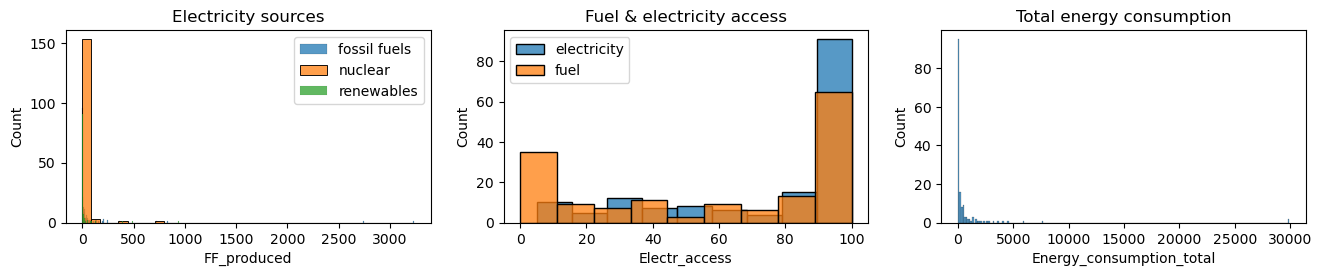

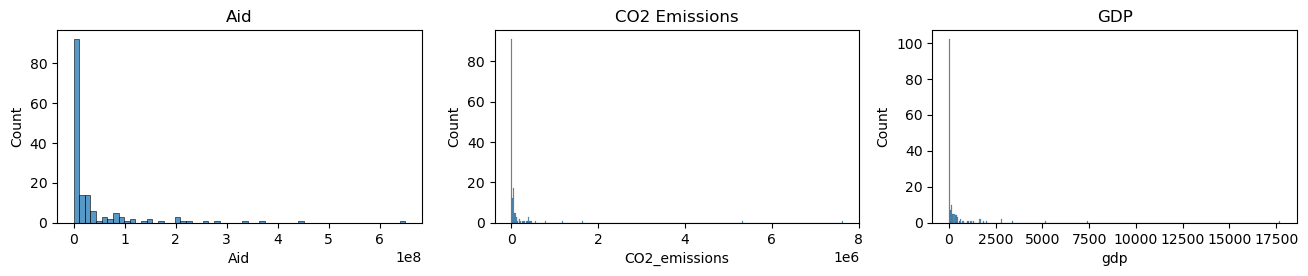

In [808]:
fig, axes = plt.subplots(1, 3, figsize=(16, 2.5))  # 3 plots
# Electr sources
sns.histplot(x=country_averages['FF_produced'], ax=axes[0], label='fossil fuels')
sns.histplot(x=country_averages['Nuc_produced'], ax=axes[0], label='nuclear')
sns.histplot(x=country_averages['Renew_produced'], ax=axes[0], label='renewables')
axes[0].set_title("Electricity sources")
axes[0].legend()
# Fuel & electricity access
sns.histplot(x=country_averages['Electr_access'], ax=axes[1], label='electricity')
sns.histplot(x=country_averages['Fuel_access'], ax=axes[1], label='fuel')
axes[1].set_title("Fuel & electricity access")
axes[1].legend()
# CO2
sns.histplot(x=country_averages['Energy_consumption_total'], ax=axes[2])
axes[2].set_title("Total energy consumption")

fig, axes = plt.subplots(1, 3, figsize=(16, 2.5))  # 3 plots
# GDP
sns.histplot(x=country_averages['Aid'], ax=axes[0])
axes[0].set_title("Aid")
# CO2
sns.histplot(x=country_averages['CO2_emissions'], ax=axes[1])
axes[1].set_title("CO2 Emissions")
# Electr sources
sns.histplot(x=country_averages['gdp'], ax=axes[2])
axes[2].set_title("GDP")

plt.show()

Many of our variables across the time period, notably average GDP and average CO2 emissions, are skewed right if plotted in original units. This means they would have a long right tail, i.e. only a few countries have extremely high values whereas the bulk of countries have much lower values. This makes sense because there are few large, industrialized countries which have very high GDP, energy/electricity production, and CO2 emissions.

In [810]:
# put log scaled variables in their own dataframe
country_avg_logscaled = country_averages.copy()

# the columns to log-scale
log_scale_columns = [
    'FF_produced', 'Nuc_produced', 'Renew_produced',
    'Electr_access', 'Energy_consumption_total', 
    'Aid', 'gdp', 'CO2_emissions']

# log transformation
for col in log_scale_columns:
    if col in country_avg_logscaled.columns:
        country_avg_logscaled[col] = country_avg_logscaled[col].apply(
            lambda x: np.log(x) if x>0 else np.nan)# replace invalid values with NaN
        
# Replace NaN or inf with 0
country_avg_logscaled.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

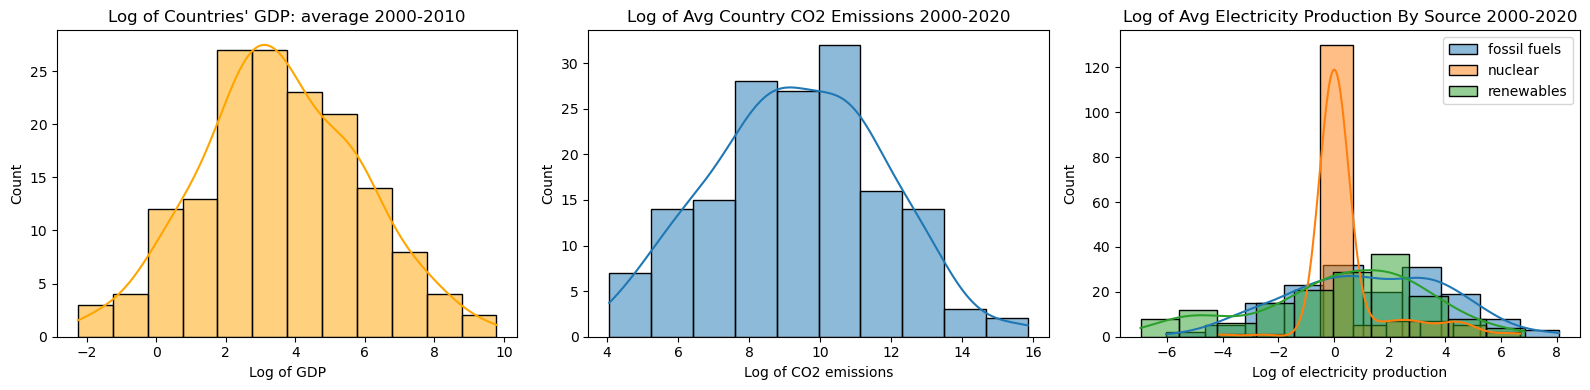

In [811]:
# plot Average CO2 emissions and Average GDP from 2000-2020 from all countries (LOG SCALE)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 3 plots
# LOG GDP
sns.histplot(x=country_avg_logscaled['gdp'], kde=True, ax=axes[0], color='orange')
axes[0].set_title("Log of Countries' GDP: average 2000-2010")
axes[0].set_xlabel("Log of GDP")
# LOG CO2
sns.histplot(x=country_avg_logscaled['CO2_emissions'], kde=True, ax=axes[1])
axes[1].set_title("Log of Avg Country CO2 Emissions 2000-2020")
axes[1].set_xlabel("Log of CO2 emissions")
# LOG ELEC SOURCES
sns.histplot(x=country_avg_logscaled['FF_produced'], kde=True, ax=axes[2], label='fossil fuels')
sns.histplot(x=country_avg_logscaled['Nuc_produced'], kde=True, ax=axes[2], label='nuclear')
sns.histplot(x=country_avg_logscaled['Renew_produced'], kde=True, ax=axes[2], label='renewables')
plt.legend()
axes[2].set_title("Log of Avg Electricity Production By Source 2000-2020")
axes[2].set_xlabel("Log of electricity production")

plt.tight_layout()
plt.show()

All variables take on fairly normal distributions if plotted on a log scale.

Log(GDP) is centered around 3 billion dollars, and log(CO2_emissions) is centered around 9 kilotons.

In terms of electricity production sources, log(fossil fuel production) and log(renewable production) are centered around 2 TWh with a wide spread, whereas log(nuclear production) is centered on 0 with a high magnitude at 0 (nuclear electricity production is not very common).

### Principal Components Analysis

Let's look at how much some variables affect the variance of the data, explained in terms of the first two principal components (combinations of the variables which explain the majority of the data's variance across space).

In [815]:
# PCA: standardize data
from sklearn.preprocessing import StandardScaler

energy_feats = country_avg_logscaled[["FF_produced", "Nuc_produced", "Renew_produced", "Electr_access", 
                                 "Prop_renew_energy_consumed", "gdp"]].dropna()
features_std = StandardScaler().fit_transform(energy_feats)
features_std = pd.DataFrame(features_std, columns = energy_feats.columns)

In [816]:
# singular value decomposition (SVD)
u, s, vt = np.linalg.svd(features_std, full_matrices = False)
vt = pd.DataFrame(vt, columns = energy_feats.columns, index = ["v1","v2","v3","v4","v5","v6"])
new_energy = features_std @ vt.T

var_explained = s**2/len(features_std)
percent_var_explained = var_explained/np.sum(var_explained)

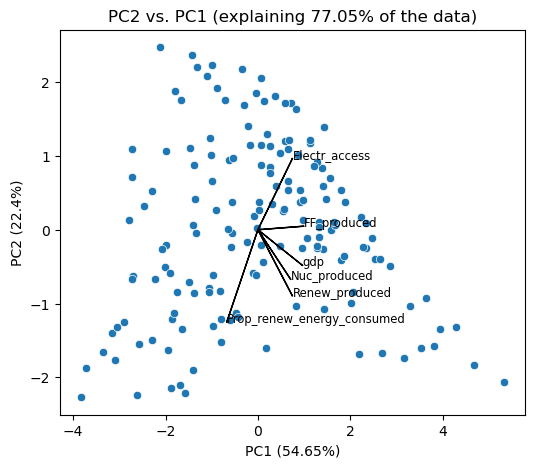

In [817]:
# plot loadings of each variable on PC1, PC2

#offsets = np.random.uniform(0, 1, vt.shape[1])*.3
plt.figure(figsize = (6, 5))
plt.title(f"PC2 vs. PC1 (explaining {np.round(percent_var_explained[0]*100 + percent_var_explained[1]*100, 2)}% of the data)")
plt.xlabel(f"PC1 ({np.round(percent_var_explained[0]*100,2)}%)")
plt.ylabel(f"PC2 ({np.round(percent_var_explained[1]*100,2)}%)")
sns.scatterplot(x = new_energy["v1"], y = new_energy["v2"]);

for i in range(vt.shape[1]):
    plt.arrow(0, 0, vt.iloc[0,i]*2, vt.iloc[1,i]*2, color = "black")
    plt.text(vt.iloc[0,i]*2, vt.iloc[1,i]*2, features_std.columns[i], fontsize = "small")

#### What we can see from this graph:

- Two variables that affect the spread/variance of the data highly are **access to electricity** and the **proportion of energy derived from renewable sources**. The lines/arrows representing these two variables point opposite directions, indicating an inverse correlation.

- Electricity sourced from nuclear & renewables are correlated/affect the spread of the data similarly
- Electricity sourced from fossil fuels affects the spread in a slightly different direction than the other sources
- Countries' GDP affects the data's variance in a _perpendicular direction_ (aka effects the variance independently) from access to electricity & the proportion of energy from renewables

### Linear correlations exploration

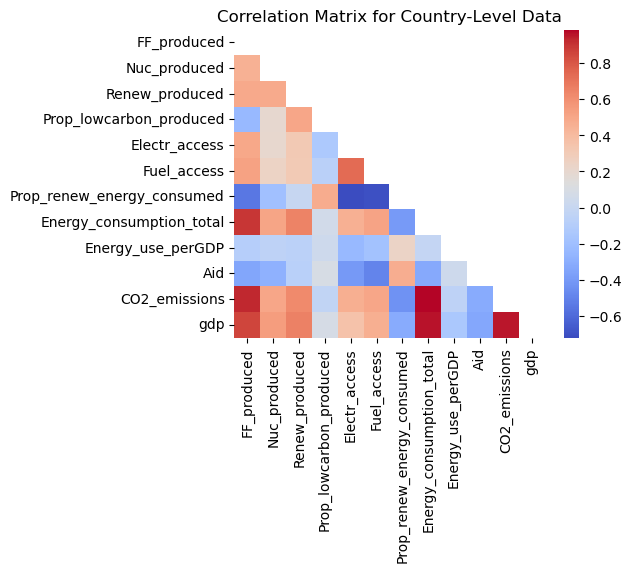

In [820]:
# Calculate correlations for country-level data
desired_variables = country_avg_logscaled[['Country', 'FF_produced', 'Nuc_produced', 'Renew_produced', 'Prop_lowcarbon_produced',
                                           'Electr_access', 'Fuel_access', 'Prop_renew_energy_consumed', 'Energy_consumption_total',
                                           'Energy_use_perGDP', 'Aid', 'CO2_emissions', 'gdp']]
                                      
corr = desired_variables.set_index('Country').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap of correlations
plt.figure(figsize=(5,4))
sns.heatmap(corr, mask=mask, cmap='coolwarm')
plt.title('Correlation Matrix for Country-Level Data')
plt.show()

#### Some notable correlations:
- GDP, co2 emissions, and fossil fuel usage are all highly positively correlated.
- GDP is positively correlated with access to electricity & fuel, electricity production from all sources, and total energy production.
- CO2 emissions are also, interestingly, positively correlated with _all three_ electricity-generation sources (including renewables).
- There is also high correlation between the production of electricity between different sources, like fossil fuel production and renewable production. This is likely because countries that generate a lot of energy are probably going to be generating high amounts from _all sources_, not just one.

- There is a strong _negative_ correlation between electricity/fuel access and the proportion of renewable energy consumed. In other words, people in countries without much access to electricity and fuels for cooking depend more on renewable energy.

### Visualizing some of these relationships through scatterplots

#### GDP:

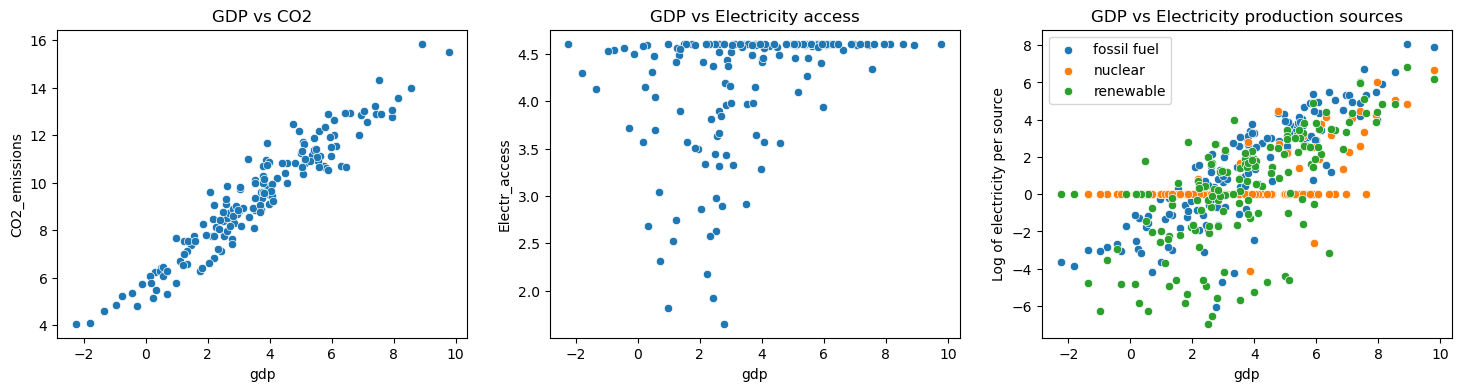

In [824]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # 3 plots

# GDP vs CO2
sns.scatterplot(x='gdp', y='CO2_emissions', data=country_avg_logscaled, ax=axes[0])
axes[0].set_title("GDP vs CO2")
# GDP vs Electricity access
sns.scatterplot(x='gdp', y='Electr_access', data=country_avg_logscaled, ax=axes[1])
axes[1].set_title("GDP vs Electricity access")
# GDP vs electricity from different sources
sns.scatterplot(x='gdp', y='FF_produced', data=country_avg_logscaled, ax=axes[2], label='fossil fuel')
sns.scatterplot(x='gdp', y='Nuc_produced', data=country_avg_logscaled, ax=axes[2], label='nuclear')
sns.scatterplot(x='gdp', y='Renew_produced', data=country_avg_logscaled, ax=axes[2], label='renewable')
axes[2].set_title("GDP vs Electricity production sources")
axes[2].set_ylabel("Log of electricity per source")
plt.legend()
plt.show()

#### OTHER VARIABLE RELATIONSHIPS:

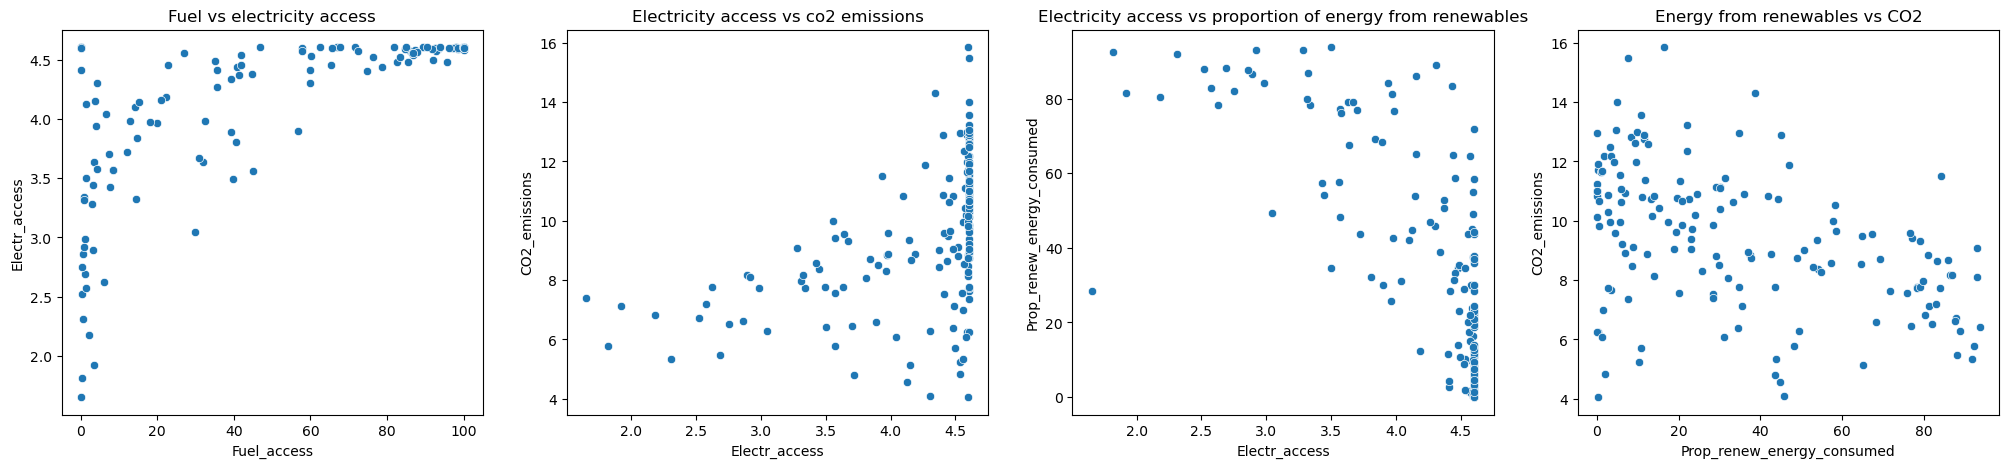

In [826]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))  # 3 plots

# Fuel and electricity access: correlated
sns.scatterplot(x='Fuel_access', y='Electr_access', data=country_avg_logscaled, ax=axes[0])
axes[0].set_title("Fuel vs electricity access")

# Electricity access and co2 production: correlated
sns.scatterplot(x='Electr_access', y='CO2_emissions', data=country_avg_logscaled, ax=axes[1])
axes[1].set_title("Electricity access vs co2 emissions")

# electricity access and energy from renewables: INVERSE
sns.scatterplot(x='Electr_access', y='Prop_renew_energy_consumed', data=country_avg_logscaled, ax=axes[2])
axes[2].set_title("Electricity access vs proportion of energy from renewables")

# proportion energy from renewables vs co2 emissions
sns.scatterplot(x='Prop_renew_energy_consumed', y='CO2_emissions', data=country_avg_logscaled, ax=axes[3])
axes[3].set_title("Energy from renewables vs CO2")
plt.show()

#### SPATIAL RELATIONSHIPS:

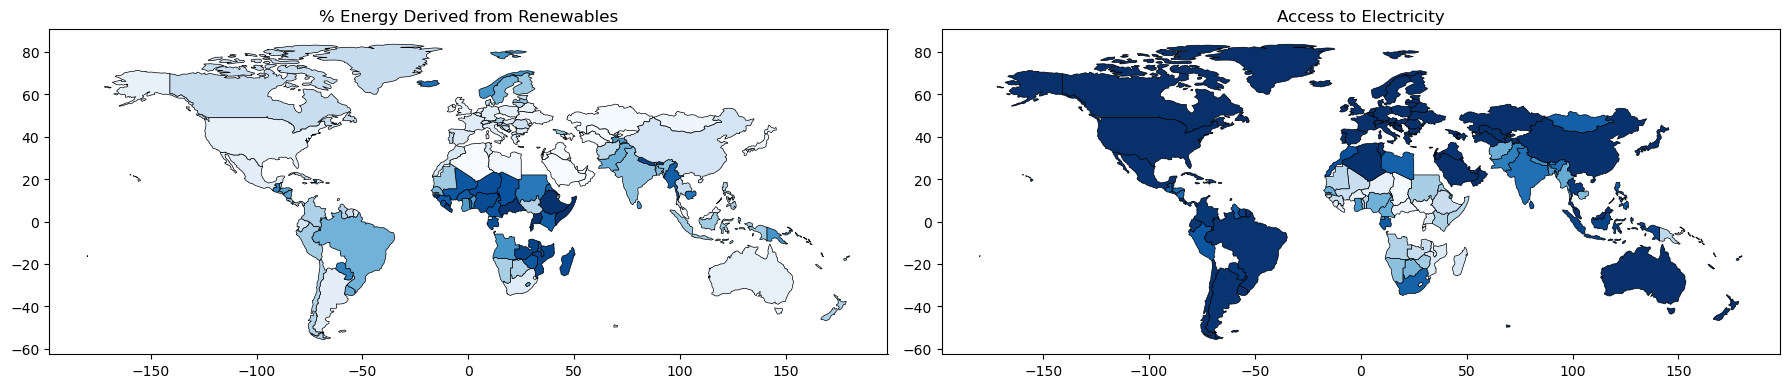

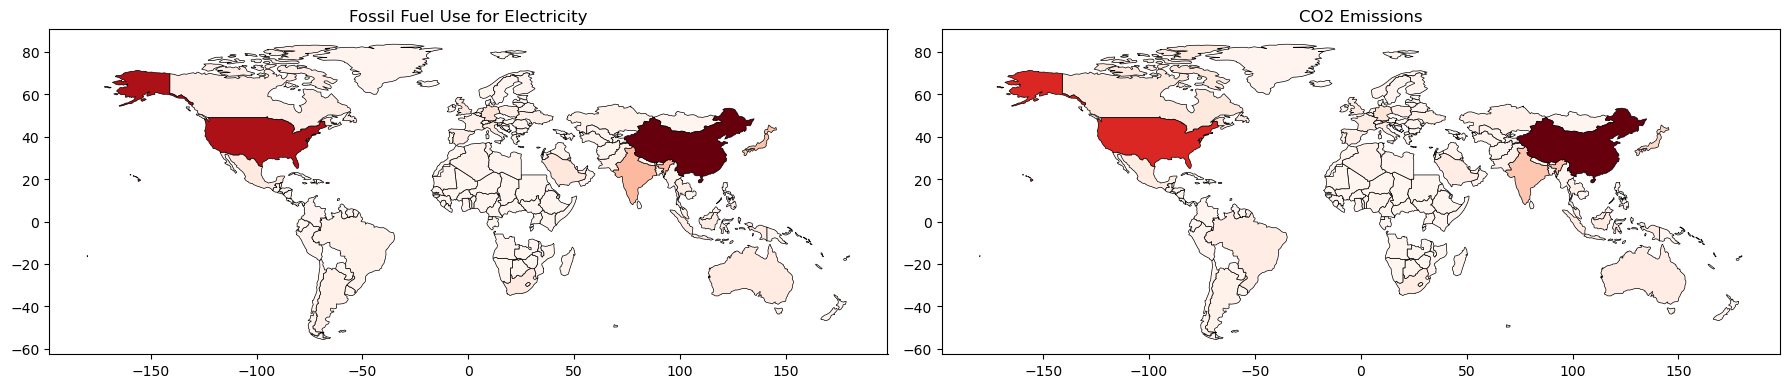

In [886]:
import geopandas as gpd

# world shapefile from geopandas built-in source
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# DATA CLEANING FOR MAPPING:
# Rename USA:
countries_to_map = country_averages
countries_to_map['Country'] = countries_to_map['Country'].replace('United States', 'United States of America', inplace=False)
world_c = world.sort_values('SOVEREIGNT')['SOVEREIGNT'].unique()
# remove the rest (small) / filter to include only countries in geopandas data:
countries_to_map = countries_to_map[countries_to_map['Country'].isin(world_c)]

# merge countries_to_map and world GDF on country name
world = world.merge(country_averages, left_on="SOVEREIGNT", right_on="Country", how="left")


# plots 1,2:
fig, axes = plt.subplots(1, 2, figsize=(18, 18))
# % energy derived from renewables
world.plot(column="Prop_renew_energy_consumed", cmap="Blues", ax=axes[0], edgecolor="black", linewidth=0.5)
axes[0].set_title("% Energy Derived from Renewables")
# access to electricity
world.plot(column="Electr_access", cmap="Blues", ax=axes[1], edgecolor="black", linewidth=0.5)
axes[1].set_title("Access to Electricity")
plt.tight_layout()
plt.show()

# Plots 3,4:
fig, axes = plt.subplots(1, 2, figsize=(18, 18))
# fossil Fuel Use
world.plot(column="FF_produced", cmap="Reds", ax=axes[0], edgecolor="black", linewidth=0.5)
axes[0].set_title("Fossil Fuel Use for Electricity")
# CO2 Emissions
world.plot(column="CO2_emissions", cmap="Reds", ax=axes[1], edgecolor="black", linewidth=0.5)
axes[1].set_title("CO2 Emissions")
plt.tight_layout()
plt.show()

We can interpret each choropleth map above:

We can see in the top 2 plots that there is a strong opposite/inverse relationship between the % energy from renewables and access to electricity, notably countries in the continent of Africa having low access to electricity and very high amounts of energy generated from renewable sources.

In the bottom 2 plots, we can see that among all the world's countries there are 2 distinct contributors to the highest fossil fuel use and the highest CO2 emissions: the U.S. and China. The other countries' values/colors don't even come close to those high levels.

#### CONCLUSIONS:

Some of the strongest positive correlations are seen in this group of variables: CO2 emissions, GDP, Total energy consumption, and Fossil fuel use for electricity generation.

Some of the strongest negative correlations are between the proportion of energy derived from renewables and access to fuels/electricity. **Since electricity/fuel access are also correlated with GDP and CO2 emissions, it is an interesting exploration to see that countries with less access to electricity and fuel, as well as lower wealth, often derive more of their energy from renewable sources and have lower CO2 emissions.**

## 3) Inference: Does GDP affect a country's energy sources?

I would like to investigate whether or not there is a _statistically significant difference_ between the proportion of energy derived from renewables for countries with a high GDP (averaged over the 20-year period) versus a low GDP.

- My **null** hypothesis that there is no difference between the mean renewable energy consumption in high vs low GDP countries.
- My **alternative** hypothesis that there _is_ a significant difference between the mean renewable energy consumption in high vs low GDP countries.

To test it, I will bootstrap/resample the original dataset, **shuffle** the renewable energy usage variable, **average** the gdp & renewable energy across all years, **classify** countries' average GDP into classes, and find the difference in average renewable energy usage between the **high** and **low** gdp classes.

This will test if a difference in means as extreme as the observed one could arise due to random chance, by comparing it to a null distribution generated over many shuffled samples.

In [477]:
# classification function, adds a column with GDP class to the dataframe
def classify_gdp(df):
    gdp_quantiles = np.percentile(df['gdp'], [33, 66]) # divide in 3 groups, using log_gdp
    df['gdp_class'] = pd.cut( # add a column for classification
        df['gdp'],
        bins=[-np.inf, gdp_quantiles[0], gdp_quantiles[1], np.inf],
        labels=['Low', 'Medium', 'High']
    )

# function for finding difference in means AFTER CLASSIFYING
def diff_in_means(df):
    # find average per gdp class
    class_means = df.drop(columns=['Country']).groupby('gdp_class', observed=False).mean().reset_index()

    # find diff in means
    highgdp = class_means.loc[class_means['gdp_class'] == 'High', 'Prop_renew_energy_consumed']
    lowgdp = class_means.loc[class_means['gdp_class'] == 'Low', 'Prop_renew_energy_consumed']
    if not highgdp.empty and not lowgdp.empty:  # Ensure both categories exist
        difference = highgdp.values[0] - lowgdp.values[0]

    return difference

In [478]:
# First, find the actual OBSERVED difference in means from original data
# we can use the country_avg_scaled dataset, since it's the original data averaged and log-transformed already.

# Classify by gdp classes using our function
classify_gdp(country_avg_logscaled)

# find diff in means using our function
observed_diff = diff_in_means(country_avg_logscaled)
observed_diff

-27.03621986631602

The observed difference in means is about -27, meaning we observe high-GDP countries using about 27 percent _less_ energy from renewables (_on average_) than low-GDP countries.

In [480]:
# Then, simulate differences in means according to the NULL HYPOTHESIS:

# use log gdp from the original dataset instead of gdp:
energy_simple_w_logGDP = energy_simple.copy()
energy_simple_w_logGDP['gdp'] = np.log(energy_simple['gdp'])

TRIALS = 1000
simulated_diffs = []

# BOOTSTRAPPING:
for i in range(TRIALS):
    # bootstrap resample
    resampled = energy_simple.sample(frac = 1, replace = True)
    resampled_country_avgs = resampled.groupby('Country').mean().reset_index().drop(columns=['Year'])

    # shuffle renewable energy column to break relationship
    resampled_country_avgs['Prop_renew_energy_consumed'] = np.random.choice(
    resampled_country_avgs['Prop_renew_energy_consumed'], 
    size=resampled_country_avgs.shape[0], 
    replace=False
)

    # Classify by gdp classes using our function
    classify_gdp(resampled_country_avgs)
    
    # find diff in means using our function
    diff = diff_in_means(resampled_country_avgs)
    simulated_diffs.append(diff)


In [481]:
# COMPUTE CONFIDENCE INTERVAL OF OUR SIMULATIONS:

ci_lower, ci_upper = np.percentile(simulated_diffs, [2.5, 97.5])
print(f"95% Confidence Interval for differences in means: {ci_lower:.2f} to {ci_upper:.2f}")

95% Confidence Interval for differences in means: -10.81 to 10.55


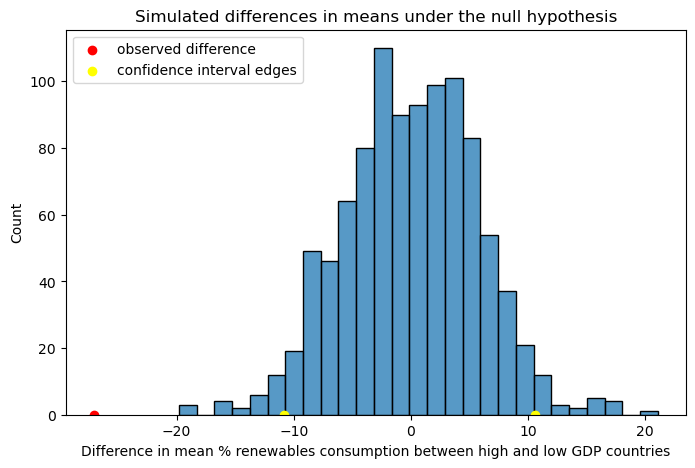

In [482]:
# PLOT IT!
plt.figure(figsize=(8,5))
sns.histplot(simulated_diffs)
plt.scatter(x=observed_diff, y=0, color='red', label='observed difference')
plt.scatter(x=[ci_lower, ci_upper], y=[0,0], color='yellow', label='confidence interval edges')
plt.legend()
plt.title("Simulated differences in means under the null hypothesis")
plt.xlabel("Difference in mean % renewables consumption between high and low GDP countries") 
plt.show()

In [483]:
# Compute the p-value
# p-value = proportion
p_value = (np.abs(simulated_diffs) >= np.abs(observed_diff)).mean()

print(f"Observed Difference: {observed_diff}")
print(f"P-value: {p_value}")

Observed Difference: -27.03621986631602
P-value: 0.0


#### CONCLUSIONS:

This p-value answers the question of: If there is no real difference between renewables used by High and Low GDP countries (AKA the true difference is 0), how likely is it to see a difference in means at least as large as the one observed in the original data?

Our p-value of 0.0 indicates that there is essentially zero chance we would observe a difference as extreme as about -27%, and strongly supports an alternative hypothesis that **there is a significant difference in renewable energy consumed by "high" vs. "low" GDP countries.** High-GDP countries, on average, derive about 27% _less_ of their total energy from renewable sources compared to low-GDP countries.

In addition, since the observed difference in means is nowhere near our 95% confidence interval of the simulated statistics, we have even more evidence to reject the null and support our alternative hypothesis.

#### CRITIQUE:

One thing that may have biased/affected my results was my method of grouping countries by GDP. I grouped them in arbitrary bins calculated by the upper/middle/lower thirds of the log-scaled GDP variable. This meant that the bins would be equally sized, since they were taken from a normal distribution, but it may not have been representative of how GDP is really spread, since in reality there are few industrialized countries with extremely high GDPs.

## 4) Prediction:

### Regularization: Ridge Regression & K-Fold Cross Validation to Optimize

My goal is to predict CO2 emissions of a country, ON AVERAGE across years 2000-2020, from multiple predictors/x variables (like different sources of electricity production, energy consumption, gdp, etc).

In [489]:
country_avg_logscaled.columns

Index(['Country', 'FF_produced', 'Nuc_produced', 'Renew_produced',
       'Prop_lowcarbon_produced', 'Electr_access', 'Fuel_access',
       'Prop_renew_energy_consumed', 'Energy_consumption_total',
       'Energy_use_perGDP', 'Aid', 'CO2_emissions', 'gdp', 'Lat', 'Long',
       'gdp_class'],
      dtype='object')

The predictor variables I will use to make a model for predicting CO2 emissions are:
1. electricity from fossil fuels
2. electricity from nuclear sources
3. electricity from renewables
4. proportion of electricity from lowcarbon sources
5. electricity access
6. fuel access
7. proportion of total energy from renewables
8. energy consumption in total
9. energy use per unit GDP
10. aid ($)
11. gdp

I'm choosing not to explore how latitude & longitude affect CO2 emissions by country, because although spatial patterns in energy use and emissions exist, it is not what I want to investigate in this linear model.

There are a lot of x variables/predictors, so instead of fitting a normal linear regression model I will fit a **regularized model with Ridge Regression**, assigning weight/importance to the variables which most effect the output and shrinking the others.

In [491]:
# define our X and Y
data = country_avg_logscaled[['FF_produced', 'Nuc_produced', 'Renew_produced', 'Prop_lowcarbon_produced', 'Electr_access',
                              'Fuel_access', 'Prop_renew_energy_consumed', 'Energy_consumption_total', 'Energy_use_perGDP', 'Aid', 'gdp']]
y = np.array(country_avg_logscaled['CO2_emissions'])

In regularization, we need to split our predictor data into training and holdout data, standardize our predictors, fit the model (Ridge Regression), and then figure out the error for different hyperparameters on validation data (taken from the train data). We will use Root Mean Squared Error (RMSE) to calculate error of our predictions. Then, at the end, we can fit our optimized model and use it to predict the holdout/test data.

In [493]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    mse = ((actual_y - predicted_y)**2).mean()
    return np.sqrt(mse)

Below is a function which uses K-fold cross validation (with 5 folds) to compute the error for multiple versions of a model, in order to optimize the model's hyperparameter and minimize error in prediction.

In the case of Ridge Regression, our hyperparameter _alpha_ controls the weight of each variable on our prediction of CO2 emissions.

In [495]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train, error_func, standardize, random_state=25):
    '''
    calculate the average validation error using K-Fold crossvalidation
    
        model: model w fit and predict functions
        X_train: train data
        Y_train: label of variable to predict
        error_func: function which computes the error of our predictions (i.e. rmse)
        standardize (True/False): whether or not our model requires standardization of the training data X and y.

        random state TO ENSURE REPRODUCIBILITY EACH TIME THE FUNCTION RUNS ON MODELS
    Returns:
        float: The average validation error over the splits
    '''
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)  # medium number of splits so that there is enough training data in each fold
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split data into train/validation sets
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]

        if standardize==True:
            # standardize split data
            scaler = StandardScaler()
            split_X_train = scaler.fit_transform(split_X_train)
            split_X_valid = scaler.transform(split_X_valid)

        # fit model on the scaled training split
        model.fit(split_X_train, split_Y_train)

        # PREDICT (on validation data)
        pred_Y_valid = model.predict(split_X_valid)

        # Compute the error from the FUNCTION, on the validation split
        error = error_func(split_Y_valid, pred_Y_valid)
        validation_errors = np.append(validation_errors, error)
        
    return np.mean(validation_errors)

Using our function, we can compute the best hyperparameter _alpha_ for our Ridge Regression model which minimizes error on the _validation_ data.

First, we will split our data into training and holdout/test data sets for our k-fold cross validation process. I used a 70% training 30% holdout split since our sample size is relatively small (our dataframe, country_avg_logscaled, is only around 160 rows/countries long) and I wanted to have enough data to test the model on. Then, we can apply many versions of our Ridge Regression model to the training/validation data and find the model's optimal hyperparameter which gives us the minimum error.

In [497]:
# FIRST, SPLIT OUR DATA INTO TRAIN AND TEST:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_holdout, Y_train, Y_holdout = train_test_split(data, y, test_size=0.3) # 30% of the data goes to TEST data

In [498]:
# Then, find the hyperparameter value (alpha) for RIDGE REGRESSION that MINIMIZES VALIDATION ERROR:
from sklearn.linear_model import Ridge
from scipy.optimize import minimize

# minimize CV error for ALPHA using a function, to get best alpha:
def error_vs_alpha(alpha):
    regularized_model = Ridge(alpha=alpha**2) # specific Ridge model
    error = compute_CV_error(regularized_model, X_train, Y_train, error_func=rmse, standardize=True)
    return error
    
result = minimize(error_vs_alpha, x0=1.0, bounds=[(1e-4, 1e4)]) # search for minimized error in a defined range of alphas

best_alpha = result.x[0]
print(f"Best alpha that minimizes cv error: {best_alpha} with train error {error_vs_alpha(best_alpha)}")

Best alpha that minimizes cv error: 1.17522477887939 with train error 0.324063471044148


In [499]:
# TEST IT!
#Final model training w/ best alpha:
best_regularized_model = Ridge(alpha = best_alpha**2)
scaler = StandardScaler() #scale
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

best_regularized_model.fit(X_train_scaled, Y_train)

# Predict on HOLDOUT set!
y_holdout_pred = best_regularized_model.predict(X_holdout_scaled)

# evaluate
holdout_rmse = rmse(Y_holdout, y_holdout_pred)
print(f"Error when predicting on test data (defined by rmse): {holdout_rmse}")

Error when predicting on test data (defined by rmse): 0.34346064093906997


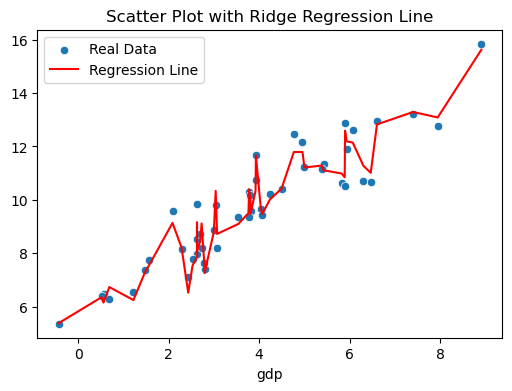

In [500]:
# PLOT ACTUAL DATA POINTS VS REGRESSION LINE
# real datapoints from holdout
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_holdout['gdp'], y=Y_holdout, label='Real Data')

# regression line
sns.lineplot(x=X_holdout['gdp'], y=y_holdout_pred, color='red', label='Regression Line')

plt.title('Scatter Plot with Ridge Regression Line')
plt.legend()
plt.show()

Again, as we can see above the multiple regression even when optimized using Ridge Regression might not be the best model to predict unknown data. The model seems to be overfitting to the noise/variability of the given train data.

The error (rmse) of our model on unknown data is around 0.3, meaning the model's predictions of CO2 emissions deviate by, on average, 0.3 kt.

We can look at the coefficients generated for each variable below, to get a sense of what was most "important" when predicting CO2 emissions from the model.

In [503]:
ridge_coefs = best_regularized_model.coef_
coefficients = pd.DataFrame({'variable': data.columns, 'coef': ridge_coefs})
coefficients.sort_values('coef', ascending=False)

,variable,coef
7,Energy_consumption_total,1.132897
10,gdp,0.913810
0,FF_produced,0.390163
8,Energy_use_perGDP,0.132467
4,Electr_access,0.107759
9,Aid,0.077479
2,Renew_produced,0.065779
3,Prop_lowcarbon_produced,-0.012902
1,Nuc_produced,-0.036908
5,Fuel_access,-0.118978


I would like to make my regression model even **more accurate**, by fitting it on less complex data. Since we know that the variables most highly linearly correlated with CO2 emissions are FF_produced, Energy_consumption_total, and gdp (from our Exploratory Data Analysis in the last section), let's fit another Ridge Regression model with only these predictors.

In [505]:
# redefine our X and Y
data = country_avg_logscaled[['FF_produced', 'Energy_consumption_total', 'gdp']]
y = np.array(country_avg_logscaled['CO2_emissions'])

# split data
np.random.seed(42)
X_train, X_holdout, Y_train, Y_holdout = train_test_split(data, y, test_size=0.3) # 30% of the data goes to TEST data

# find best alpha for Ridge
def error_vs_alpha(alpha):
    regularized_model = Ridge(alpha=alpha**2) # specific Ridge model
    error = compute_CV_error(regularized_model, X_train, Y_train, error_func=rmse, standardize=True)
    return error

result = minimize(error_vs_alpha, x0=1.0, bounds=[(1e-4, 1e4)]) # search for minimized error in a defined range of alphas
best_alpha = result.x[0]

# redo the process: TEST the final model w best alpha:
best_regularized_model = Ridge(alpha = best_alpha**2)
scaler = StandardScaler() #scale
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

best_regularized_model.fit(X_train_scaled, Y_train)

# Predict on HOLDOUT set!
ridge_y_holdout_pred = best_regularized_model.predict(X_holdout_scaled)

# evaluate
holdout_rmse = rmse(Y_holdout, ridge_y_holdout_pred)
print(f"Error (defined by rmse): {holdout_rmse}")

Error (defined by rmse): 0.3398687158454944


The model's error doesn't get much better even when we simplify the model with less parameters. Let's try something else:

### Categorical Prediction/Classification:

Instead of predicting the exact amount of CO2 emissions by country, I would simply like to see if I can predict whether its emissions fall into a category of "high", "medium", or "low" based on binning all the countries into 3 groups of CO2 emissions amounts.

In [509]:
def classify_co2levels(df):
    co2_quantiles = np.percentile(df['CO2_emissions'], [33, 66])  # Divide into 3 groups
    # new column with classes
    df['co2_level'] = pd.cut(
        df['CO2_emissions'],
        bins=[-np.inf, co2_quantiles[0], co2_quantiles[1], np.inf],  # low, med, high categories
        labels=['Low', 'Medium', 'High']
    )
    return df

In [510]:
# classify each country on average
co2_classified = classify_co2levels(country_avg_logscaled)
co2_classified.head()

,Country,FF_produced,Nuc_produced,Renew_produced,Prop_lowcarbon_produced,Electr_access,Fuel_access,Prop_renew_energy_consumed,Energy_consumption_total,Energy_use_perGDP,Aid,CO2_emissions,gdp,Lat,Long,gdp_class,co2_level
0,Afghanistan,-1.663241,0.000000,-0.299819,78.872636,3.961203,19.802381,25.6805,3.306401,2.0390,17.211009,8.312135,2.843858,33.939110,67.709953,Medium,Medium
1,Algeria,3.847926,0.000000,-1.007206,0.742125,4.596212,98.904762,0.2870,6.317408,4.4985,12.861617,11.694588,5.089993,28.033886,1.659626,High,High
2,Angola,0.713183,0.000000,1.486355,68.980548,3.559299,44.933333,57.6970,4.610646,2.8965,15.327493,9.984584,4.571381,-11.202692,17.873887,High,Medium
3,Antigua and Barbuda,-1.304056,0.000000,-5.857933,0.861557,4.593338,100.000000,0.2005,1.153011,3.6240,14.141726,6.240276,0.292016,17.060816,-61.796428,Low,Low
4,Argentina,4.334798,1.905513,3.520799,35.772016,4.587429,98.469048,9.5605,6.898170,3.4975,19.244428,11.985812,6.079213,-38.416097,-63.616672,High,High


I want to evaluate many different predictive models against each other, seeing the error they produce.

I would like to compare specifically: **Decision trees/Random forest**, **Naive Bayes**, and **KNN** classification models.

I will use a train, test split similar to the one defined above, but this time our y variable will be the CO2 emission categories. We'll use this train test split FOR EACH MODEL (so that we can compare them), to:

1. optimize one model at a time to find the best hyperparameter (e.g. tree depth in decision trees) by using the same k-fold cross validation technique on the train data
2. train each model, with its optimized hyperparameters, on the entire training data
3. evaluate each model's accuracy/error on the test data.

Let's see which classification model has the best predictions on countries' CO2 emissions levels!

In [512]:
# we need a function to determine error from our classification models, let's just evaluate overall accuracy of predictions.
# our function will be INACCURACIES, so that we can MINIMIZE (same as maximizing accuracy)

def inaccuracy(actual_y, predicted_y):
    correct_predictions = (actual_y == predicted_y).sum() # num correct predictions
    total_predictions = len(actual_y) # total
    return 1 - correct_predictions / total_predictions

Below I defined some functions to group together processes I had been repeating for each model, like optimizing for the best hyperparameter, testing on the holdout data, graphing the hyperparameters selelection, etc.

In [514]:
# 1 function, simplified all together to optimize hyperparameter and test the model on test data:
def optimize_and_test_model(model_class, param_range, X_train, Y_train, X_holdout, Y_holdout, standardize, hyperparam_name="param"):
    '''
    optimizes the given model for a range of hyperparameters on specific data

    outputs the optimal hyperparameter, the minimized error it produces on the train/val data,
    and a DataFrame of error vs hyperparameter values
    '''
    cv_errors = []
    
    # kfold cv to find optimal hyperparameter
    for param in param_range:
        model = model_class(**{hyperparam_name: param})
        error = compute_CV_error(model, X_train, Y_train, error_func=inaccuracy, standardize=standardize) # standardize here
        cv_errors.append(error)
    
    # find the optimal hyperparameter i.e. max depth
    error_vs_param = pd.DataFrame({hyperparam_name: param_range, 'CV Error': cv_errors})
    minimized = error_vs_param[error_vs_param['CV Error'] == (error_vs_param['CV Error'].min())].reset_index()
    best_param = minimized.iloc[0,1]
    best_error = minimized.iloc[0,2]

    # THEN TEST FINAL MODEL ON TEST DATA:
    if standardize==True: # scale everything
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_holdout = scaler.transform(X_holdout) # use training scaler for the test set
    # first train the final model with the best hyperparameter
    best_model = model_class(**{hyperparam_name: best_param})
    best_model.fit(X_train, Y_train)
    
    # test final trained model
    y_holdout_pred = best_model.predict(X_holdout)
    holdout_error = inaccuracy(Y_holdout, y_holdout_pred)
    
    return best_param, holdout_error, error_vs_param

In [515]:
# function for plotting the hyperparameter values when we optimize, for supplemental understanding:
def plot_error_vs_param(error_vs_param, best_param, param_name):
    plt.figure(figsize=(4, 3))
    sns.lineplot(x=param_name, y='CV Error', data=error_vs_param)
    sns.lineplot(x=[best_param, best_param], y=[0, 0.5], color='red')
    plt.xlabel(f'{param_name}')
    plt.ylabel('Inaccuracy (1 - Accuracy)')
    plt.title(f'Inaccuracy vs {param_name}')
    plt.show()

Let's re-define our X and Y and train/test splits for classification.

In [517]:
# define our X and Y
data = co2_classified[['FF_produced', 'Nuc_produced', 'Renew_produced', 'Prop_lowcarbon_produced', 'Electr_access', 'Fuel_access', 
                       'Prop_renew_energy_consumed', 'Energy_consumption_total', 'Energy_use_perGDP', 'Aid', 'gdp']]
y = np.array(co2_classified['co2_level'])

# split our data again
np.random.seed(42) # same split, to compare models
X_train, X_holdout, Y_train, Y_holdout = train_test_split(data, y, test_size=0.3) # 30% of the data goes to TEST data

#### DECISION TREES

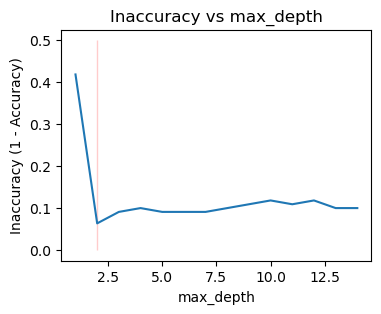

Best tree-depth that minimizes decision tree cv error: 2
Error of optimized model's prediction on test data ('inaccuracy'): 0.20833333333333337


In [519]:
# DECISION TREES:
from sklearn.tree import DecisionTreeClassifier

best_depth, holdout_error_decisiontree, error_vs_depth = optimize_and_test_model(
    model_class=DecisionTreeClassifier,
    param_range=range(1, 15),
    X_train=X_train, Y_train=Y_train, # training data
    X_holdout=X_holdout, Y_holdout=Y_holdout, # test data
    standardize=False,
    hyperparam_name="max_depth" # hyperparameter
)
# understand our process:
plot_error_vs_param(error_vs_depth, best_depth, 'max_depth')
print(f"Best tree-depth that minimizes decision tree cv error: {best_depth}")
print(f"Error of optimized model's prediction on test data ('inaccuracy'): {holdout_error_decisiontree}")

#### K NEAREST NEIGHBORS:

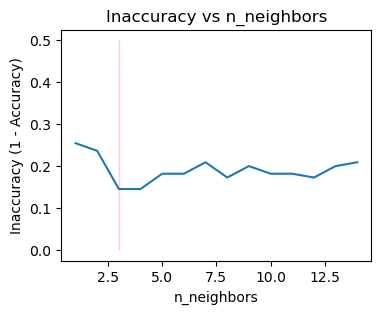

Best n_neighbors that minimizes KNN cv error: 3
Error of optimized model's prediction on test data ('inaccuracy'): 0.14583333333333337


In [521]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

best_n, holdout_error_knn, error_vs_n = optimize_and_test_model(
    model_class=KNeighborsClassifier,
    param_range=range(1, 15),
    X_train=X_train, Y_train=Y_train, # training data
    X_holdout=X_holdout, Y_holdout=Y_holdout, # test data
    standardize=True, # standardize b/c KNN concerns distances
    hyperparam_name="n_neighbors" # hyperparameter
)
# understand our process:
plot_error_vs_param(error_vs_n, best_n, 'n_neighbors')
print(f"Best n_neighbors that minimizes KNN cv error: {best_n}")
print(f"Error of optimized model's prediction on test data ('inaccuracy'): {holdout_error_knn}")

#### NAIVE BAYES:

Naive Bayes classifies based on probability, instead of using distance like KNN. It is often more efficient than KNN with high-dimensional data.
Multinomial Naive Bayes is best for categorical multi-class classification, so we will use that.

The multinomial naive bayes model doesn't require scaling, so we can use our country_averages dataframe instead of country_avg_logscaled. Features are considered in terms of counts/probabilities in this model, so scaling/linearizing isn't needed.

In [524]:
# Naive Bayes:
# classify each country on average in the unscaled df:
co2_classes_unscaled = classify_co2levels(country_averages)

# redefine our X and Y for classification
data_nb = co2_classes_unscaled[['FF_produced', 'Nuc_produced', 'Renew_produced', 'Prop_lowcarbon_produced', 'Electr_access',
                              'Fuel_access', 'Prop_renew_energy_consumed', 'Energy_consumption_total', 'Energy_use_perGDP', 'Aid', 'gdp']]
y = np.array(co2_classes_unscaled['co2_level'])

# redo train/test split
np.random.seed(42) # same split, to compare models
X_train_nb, X_holdout_nb, Y_train_nb, Y_holdout_nb = train_test_split(data_nb, y, test_size=0.3) # 30% of the data goes to TEST data

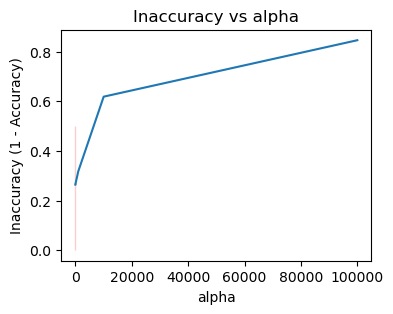

Best alpha that minimizes Naive Bayes cv error: 1e-05
Error of optimized model's prediction on test data ('inaccuracy'): 0.29166666666666663


In [525]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

best_a, holdout_error_nb, error_vs_a = optimize_and_test_model(
    model_class=MultinomialNB,
    param_range=np.logspace(-5, 5, 11), # use a log scale for alpha
    X_train=X_train_nb, Y_train=Y_train_nb, # training data
    X_holdout=X_holdout_nb, Y_holdout=Y_holdout_nb, # test data
    standardize=False, # standardize b/c KNN concerns distances
    hyperparam_name="alpha" # hyperparameter
)
# understand our process:
plot_error_vs_param(error_vs_a, best_a, 'alpha')
print(f"Best alpha that minimizes Naive Bayes cv error: {best_a}")
print(f"Error of optimized model's prediction on test data ('inaccuracy'): {holdout_error_nb}")

#### COMPARING THE CLASSIFICATION MODELS' ACCURACY

In [527]:
model_vs_error = pd.DataFrame({'model': ['Decision tree', 'KNN', 'Naive Bayes'], 
                               'Holdout Error (11 predictors)': np.array([holdout_error_decisiontree, holdout_error_knn, holdout_error_nb])})
model_vs_error

,model,Holdout Error (11 predictors)
0,Decision tree,0.208333
1,KNN,0.145833
2,Naive Bayes,0.291667


KNN with 5 neighbors has the best predictive ability on our multivariate data, predicting a country's average Co2 emissions level class with the best accuracy from our 11 predictors.

From this process I then did some feature engineering to pick the most important predictors used (from our decision tree model, as an example, using feature_importances_). Below, we can see that **FF_produced** and **Renew_Produced** are the most influential variables on predicting a country's CO2 emissions class.

For further exploration, let's see how each of our models perform when trained on these 2 features instead of 11. We will cross-validate again for optimizing hyperparameters, compute the error of each simplified model, and finally arrive at a conclusion of which feature set (simpler/smaller or more multivariate) is best for predicting our y.

In [529]:
# We can see the most important features used in the model using feature_importances_ from the decision tree model
best_decisiontree = DecisionTreeClassifier(max_depth=2)
best_decisiontree.fit(X_train, Y_train)

feature_importances = best_decisiontree.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,FF_produced,0.529757
7,Energy_consumption_total,0.441491
2,Renew_produced,0.028752
1,Nuc_produced,0.000000
3,Prop_lowcarbon_produced,0.000000
4,Electr_access,0.000000
5,Fuel_access,0.000000
6,Prop_renew_energy_consumed,0.000000
8,Energy_use_perGDP,0.000000
9,Aid,0.000000


Let's classify using only these two variables

In [531]:
# redefine our X and Y for classification
data_simplified = co2_classified[['FF_produced', 'Renew_produced']]
y = np.array(co2_classified['co2_level'])

# split our data again
np.random.seed(42) # same split, to compare models
X_train_simple, X_holdout_simple, Y_train_simple, Y_holdout_simple = train_test_split(data_simplified, y, test_size=0.3) # 30% of the data goes to TEST data


# test each model on simplified data:
# DECISION TREE
best_depth2, holdout_error_decisiontree2, error_vs_depth2 = optimize_and_test_model(
    model_class=DecisionTreeClassifier,
    param_range=range(1, 15),
    X_train=X_train_simple, Y_train=Y_train_simple, # training data
    X_holdout=X_holdout_simple, Y_holdout=Y_holdout_simple, # test data
    standardize=False,
    hyperparam_name="max_depth" # hyperparameter
)

# KNN
best_n2, holdout_error_knn2, error_vs_n2 = optimize_and_test_model(
    model_class=KNeighborsClassifier,
    param_range=range(1, 15),
    X_train=X_train_simple, Y_train=Y_train_simple, # training data
    X_holdout=X_holdout_simple, Y_holdout=Y_holdout_simple, # test data
    standardize=False,
    hyperparam_name="n_neighbors" # hyperparameter
)

# Naive Bayes: make sure to use unscaled dataset
co2_classes_unscaled = classify_co2levels(country_averages)
data_simplified_nb = co2_classes_unscaled[['FF_produced', 'Renew_produced']]
y = np.array(co2_classes_unscaled['co2_level'])
# redo train/test split
np.random.seed(42) # same split, to compare models
X_train_simplenb, X_holdout_simplenb, Y_train_simplenb, Y_holdout_simplenb = train_test_split(data_simplified_nb, y, test_size=0.3) # 30% of the data goes to TEST data

# nb model
best_a2, holdout_error_nb2, error_vs_n2 = optimize_and_test_model(
    model_class=MultinomialNB,
    param_range=np.logspace(-5, 5, 11), # use a log scale for alpha
    X_train=X_train_simplenb, Y_train=Y_train_simplenb, # training data
    X_holdout=X_holdout_simplenb, Y_holdout=Y_holdout_simplenb, # test data
    standardize=False,
    hyperparam_name="alpha" # hyperparameter
)

In [532]:
model_vs_error['Holdout Error (2 predictors)'] = [holdout_error_decisiontree2, holdout_error_knn2, holdout_error_nb2]
model_vs_error

,model,Holdout Error (11 predictors),Holdout Error (2 predictors)
0,Decision tree,0.208333,0.270833
1,KNN,0.145833,0.229167
2,Naive Bayes,0.291667,0.520833


We can see that a simpler feature subset was not necessarily better for predicting unknown data with any of our models. Only using 2 predictors reduces the amount of information we use to train the models, resulting in higher error. However, we can see that no matter the number of features used as predictors, our KNN model still is going to perform much better than the other two. 

**KNN(n_neighbors=3) predicts around 85.5% of our data correctly when trained on our 11 predictors.**

#### LOOKING AT OUR FINAL MODEL: KNN

In [535]:
# Let's visualize the KNN prediction using 2 predictors (to plot in 2D) (even though 11 predictors is the best)

# data w 2 predictors:
data_simplified = co2_classified[['FF_produced', 'Renew_produced']]
y = np.array(co2_classified['co2_level'])
# map categorical labels to numeric values:
y_numeric = [2 if x == 'High' else 1 if x == 'Medium' else 0 if x == 'Low' else 0 for x in y]

data_vis = pd.DataFrame({'FF_produced': data_simplified['FF_produced'], 
                            'Renew_produced': data_simplified['Renew_produced'], 
                            'co2_level': y_numeric})
X_train, X_test, y_train, y_test = train_test_split(data_simplified, y_numeric, test_size=0.3, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train) # fit model
data_vis['Predicted_co2_class'] = knn_model.predict(data_simplified) # predict classes & add to df
data_vis.head(3)

,FF_produced,Renew_produced,co2_level,Predicted_co2_class
0,-1.663241,-0.299819,1,0
1,3.847926,-1.007206,2,2
2,0.713183,1.486355,1,1


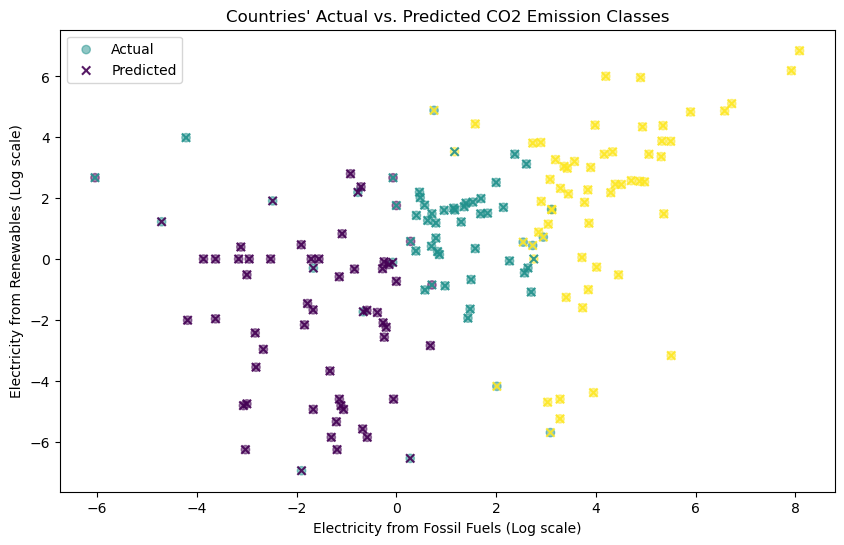

In [536]:
# PLOT/VISUALIZE THE MODEL PREDICTIONS:
plt.figure(figsize=(10, 6))
plt.scatter(x='FF_produced', y='Renew_produced', data=data_vis, c='co2_level', cmap='viridis', label='Actual', alpha=0.5) # ACTUAL classes
plt.scatter(x='FF_produced', y='Renew_produced', data=data_vis, c='Predicted_co2_class', cmap='viridis', marker='x', label='Predicted', alpha=0.9) # PREDICTED classes
# labels
plt.xlabel('Electricity from Fossil Fuels (Log scale)')
plt.ylabel('Electricity from Renewables (Log scale)')
plt.title("Countries' Actual vs. Predicted CO2 Emission Classes")
plt.legend()
plt.show()

This simple plot above shows the accuracy of our KNN predictions of CO2 class predicted on 2 variables, FF_produced (electricity from fossil fuels) and Renew_produced (electricity from renewables. As we can see, there is minimal overlap between the classification of the 3 classes (Low, Medium, and High Co2 emissions, or 0,1,2), and most of the predicted class are within their respective real class bounds, meaning our model did well.

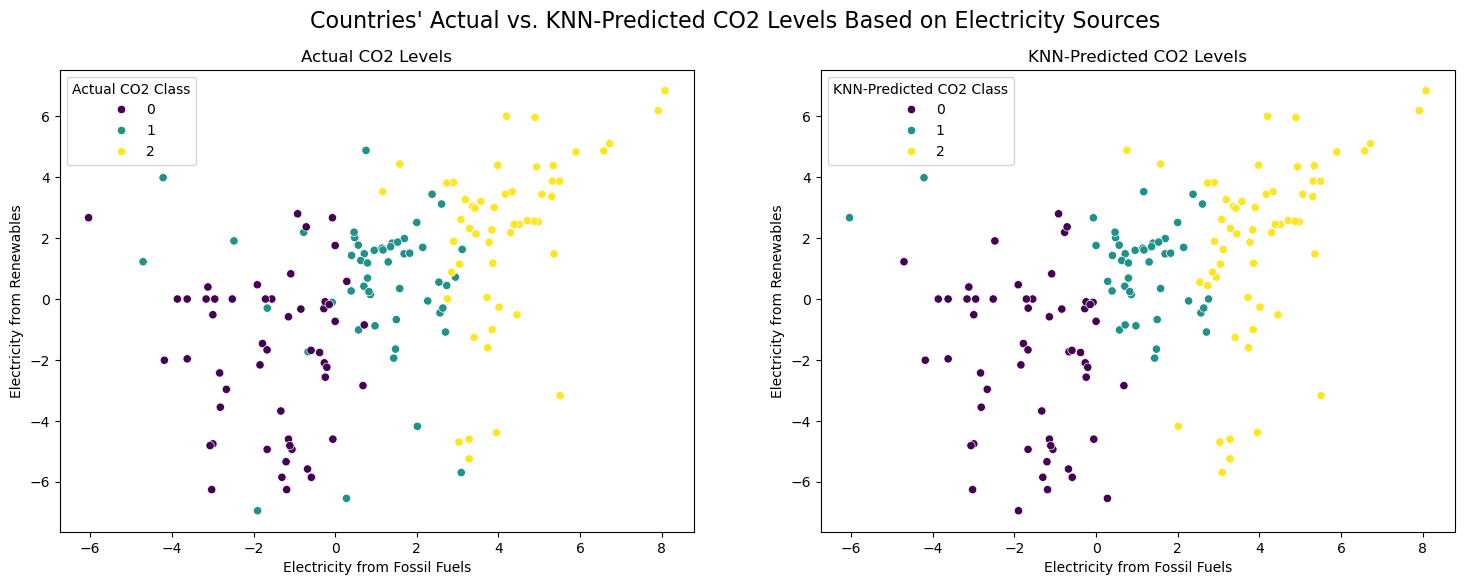

In [538]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 2 plots

sns.scatterplot(x='FF_produced', y='Renew_produced', data=data_vis, hue='co2_level', palette='viridis', ax=axes[0])
axes[0].set_title("Actual CO2 Levels")
axes[0].set_xlabel('Electricity from Fossil Fuels')
axes[0].set_ylabel('Electricity from Renewables')
axes[0].get_legend().set_title("Actual CO2 Class")

sns.scatterplot(x='FF_produced', y='Renew_produced', data=data_vis, hue='Predicted_co2_class', palette='viridis', ax=axes[1])
axes[1].set_title("KNN-Predicted CO2 Levels")
axes[1].set_xlabel('Electricity from Fossil Fuels')
axes[1].set_ylabel('Electricity from Renewables')
axes[1].get_legend().set_title("KNN-Predicted CO2 Class")

fig.suptitle("Countries' Actual vs. KNN-Predicted CO2 Levels Based on Electricity Sources", fontsize=16)

plt.show()

Above, we get a more in-depth look at where each class (0,1,2) falls in terms of its predictors (FF_produced and Renew_produced).

On average, countries with higher FF_produced are classified as high CO2 emissors, and interestingly, countries with the highest values of Renew_produced are _ALSO_ classified as the highest emissors. This might not be intuitive, but as we discussed before, if a country has high energy & electricity production levels, that energy may come from _all_ sources, including both fossil fuels _and_ renewables.

This model is useful if we are interested in looking at/predicting what kinds of attributes high CO2 emissor countries have, in terms of their energy usage and production. We could use it to predict a country's CO2 emissions that was not in/excluded from the dataset, if we had data on that country's average energy consumption/production habits.

## 5) Afterword

Some things that I could do to extend this exploration:

- Instead of just classifying CO2 levels into evenly distributed bins, it would be interesting to predict whether a country is "on track" (through classification) to meet its Paris Agreement goals of cutting emissions to limit global warming to 1.5–2°C. This would make our predictive model more meaningful. (some already-used classifications of this kind are on https://climateactiontracker.org/countries/)

- It would also be interesting to fit a KNN model using latitude and longitude variables, and visualize the results with a scatter plot, to see where different predicted CO2 "levels" fall geographically, showing spatial patterns.

Thank you for reading :)